### scrip to overview the models

import packages ...

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


os.chdir('../../data/')

load species table...

In [2]:
# species_table = 'species.tsv'
species_table = 'species_with_addition.tsv'
species_df = pd.read_csv(species_table, sep='\t')
name_list = list(species_df['file_name'])
input_dir_1 = 'draft_GEMs/model_version_1.0/'
input_dir_2 = 'draft_GEMs/draft_from_RAVEN_metacyc23_5/'

species_df = species_df.drop_duplicates(subset=['file_name'], keep='first')  # NOTE:butyrate_producing_bacterium dup
species_dic = species_df[['file_name', 'bofTemplateType', 'M2', 'species_experiment']].set_index('file_name').T.to_dict(
    'list')

draft overview


167 draft GEMs in total


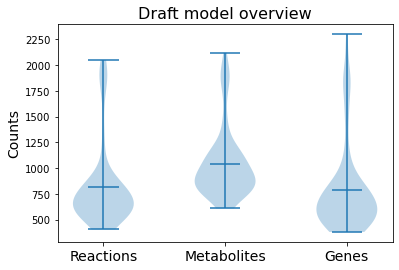

In [6]:
print('%d draft GEMs in total'%len(species_df))

fig, axs = plt.subplots(nrows=1, ncols=1, )

# plot violin plot
axs.violinplot(dataset=[species_df['draft_rxn_count'].values,
                        species_df['draft_met_count'].values,
                        species_df['draft_gen_count'].values, ],
               showmeans=True,
               showmedians=False)
axs.set_title('Draft model overview', fontsize=16)
# axs.set_xlabel('Four separate samples')
axs.set_ylabel('Counts', fontsize=14)
plt.setp(axs, xticks=[y + 1 for y in range(3)],
         xticklabels=['Reactions', 'Metabolites', 'Genes'], )
axs.tick_params(axis='x', which='major', labelsize=14)

plt.show()



version 1 overview

167 version 1 GEMs in total


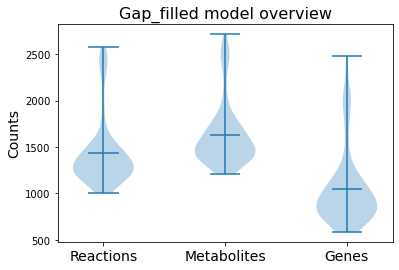

In [8]:
print('%d version 1 GEMs in total'%len(species_df))
fig, axs = plt.subplots(nrows=1, ncols=1, )

# plot violin plot
axs.violinplot(dataset=[species_df['version_1_rxn_count'].values,
                        species_df['version_1_met_count'].values,
                        species_df['version_1_gen_count'].values,
                        ],
               showmeans=True,
               showmedians=False)
axs.set_title('Gap_filled model overview', fontsize=16)
# axs.set_xlabel('Four separate samples')
axs.set_ylabel('Counts', fontsize=14)
plt.setp(axs, xticks=[y + 1 for y in range(3)],
         xticklabels=['Reactions', 'Metabolites', 'Genes'], )
axs.tick_params(axis='x', which='major', labelsize=14)

plt.show()


draw gaps

95 GramPositive GEMs in total
71 GramNegative GEMs in total
1 Archaea GEMs in total


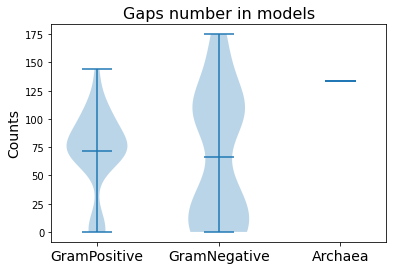

In [10]:
print('%d GramPositive GEMs in total'%len(species_df[species_df['bofTemplateType'] == 'GramPositive']))
print('%d GramNegative GEMs in total'%len(species_df[species_df['bofTemplateType'] == 'GramNegative']))
print('%d Archaea GEMs in total'%len(species_df[species_df['bofTemplateType'] == 'Archaea']))

fig, axs = plt.subplots(nrows=1, ncols=1, )

# plot violin plot
axs.violinplot(dataset=[species_df.loc[species_df['bofTemplateType'] == 'GramPositive','version_1_gap_count'].values,
                        species_df.loc[species_df['bofTemplateType'] == 'GramNegative','version_1_gap_count'].values,
                        species_df.loc[species_df['bofTemplateType'] == 'Archaea','version_1_gap_count'].values,
                        ],
               showmeans=True,
               showmedians=False)
axs.set_title('Gaps number in models', fontsize=16)
# axs.set_xlabel('Four separate samples')
axs.set_ylabel('Counts', fontsize=14)
plt.setp(axs, xticks=[y + 1 for y in range(3)],
         xticklabels=['GramPositive', 'GramNegative', 'Archaea'], )
axs.tick_params(axis='x', which='major', labelsize=14)

plt.show()


draw growth rate

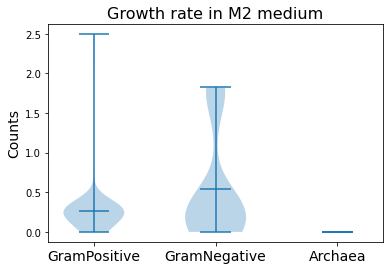

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=1, )

# plot violin plot
axs.violinplot(dataset=[species_df.loc[species_df['bofTemplateType'] == 'GramPositive','version_1_growth_rate'].values,
                        species_df.loc[species_df['bofTemplateType'] == 'GramNegative','version_1_growth_rate'].values,
                        species_df.loc[species_df['bofTemplateType'] == 'Archaea','version_1_growth_rate'].values,
                        ],
               showmeans=True,
               showmedians=False)
axs.set_title('Growth rate in M2 medium', fontsize=16)
# axs.set_xlabel('Four separate samples')
axs.set_ylabel('Counts', fontsize=14)
plt.setp(axs, xticks=[y + 1 for y in range(3)],
         xticklabels=['GramPositive', 'GramNegative', 'Archaea'], )
axs.tick_params(axis='x', which='major', labelsize=14)

plt.show()

draw growth rate in M2 media

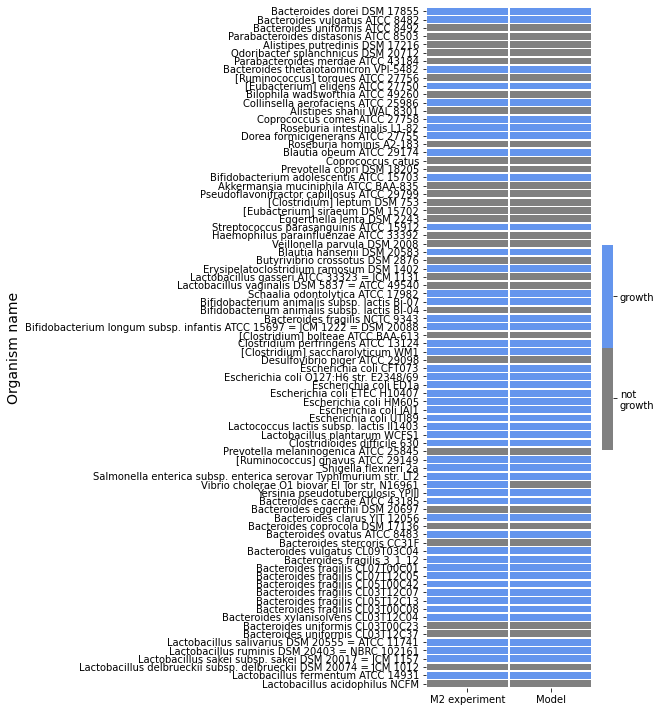

In [22]:
temp_df = species_df.loc[(~species_df['M2'].isnull()),['organism_name','M2','version_1_growth_rate']]
temp_df['M2 experiment'] = 1
temp_df.loc[(temp_df['M2']=='0'),'M2 experiment'] = 0
temp_df['Model'] = temp_df['version_1_growth_rate']
temp_df.loc[(temp_df['version_1_growth_rate']>0.001),'Model'] = 1


temp_df.index = temp_df['organism_name']
temp_df = temp_df[['M2 experiment','Model']]
# plt.imshow(a, cmap='hot', interpolation='nearest')
# plt.show()
import matplotlib.colors as mcolors

cmap, norm = mcolors.from_levels_and_colors([0, 0.5, 1], ['grey','CornflowerBlue' ])
# plt.pcolor(temp_df)

plt.figure(figsize=(9, 10))
ax = sns.heatmap(temp_df, cmap=cmap, linewidths=0.5, cbar_kws={"shrink": .30})
ax.set_ylabel('Organism name', fontsize=14)

plt.yticks(np.arange(0.5, len(temp_df.index), 1), temp_df.index,fontsize=10)
plt.xticks(np.arange(0.5, len(temp_df.columns), 1), temp_df.columns)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0.25,  .75, ])
cbar.set_ticklabels(['not\ngrowth','growth'])
plt.tight_layout()
plt.show()
plt.close()